# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [224]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
%matplotlib inline

## Load the Data

In [120]:
df = pd.read_csv('Traffic_Accidents.csv')
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [123]:
df.duplicated().sum()

43

In [ ]:
df.info()

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [126]:
df['Weather_Conditions'].unique()

array(['Raining with high winds', 'Fine without high winds',
       'Raining without high winds', 'Fog or mist',
       'Fine with high winds', 'Unknown', 'Snowing without high winds',
       'Other', 'Snowing with high winds'], dtype=object)

It is better to assign unknown data as NaN

In [129]:
df.replace(["Unknown", "unknown", 'na', 'Na'], np.nan, regex = True, inplace = True)

In [130]:
df = df.dropna()

In [131]:
df.drop_duplicates(inplace=True)

In [132]:
df.describe().iloc[[1,5], :]

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
mean,438902.206352,300670.78284,-1.446923,52.593963,30.996191,2.833691,1.838852,1.359771,4.128059,356.522248,4.106686,987.247591,39.797236,2.587695,348.542845,1.385041,2009.386437
50%,439130.000000,270410.00000,-1.416494,52.321571,31.000000,3.000000,2.000000,1.000000,4.000000,340.000000,4.000000,123.000000,30.000000,3.000000,0.000000,1.000000,2010.000000


In **1st_Road_Number** and **2nd_Road_Number**, there is significant gap between the mean and the median. This indicates the presence of an outliyer.

In [136]:
cat_data = ['Did_Police_Officer_Attend_Scene_of_Accident', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Light_Conditions','Road_Type']

In [142]:
df = pd.get_dummies(df, columns = cat_data)
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Weather_Conditions_Snowing without high winds,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Road_Type_Dual carriageway,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,False,True,False,False,False,True,False,False,False,False
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,False,False,True,False,False,False,False,False,True,False
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,False,False,False,False,True,False,False,False,True,False
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,False,False,False,False,True,False,True,False,False,False
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51994,423266.0,528320.0,-1.640944,54.649466,11,3.0,2,2.0,27/06/2012,4,...,False,False,False,False,True,False,False,False,True,False
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,False,True,False,False,False,False,False,False,True,False
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,False,False,False,False,True,False,False,False,True,False
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,False,False,False,False,True,False,False,False,True,False


In [155]:
encoded_col = OrdinalEncoder().fit_transform(df[['Road_Surface_Conditions']])

In [159]:
df['encoded_col'] = encoded_col


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Road_Type_Dual carriageway,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,encoded_col
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,True,False,False,False,True,False,False,False,False,1.0
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,False,True,False,False,False,False,False,True,False,0.0
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,False,False,False,True,False,False,False,True,False,0.0
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,False,False,False,True,False,True,False,False,False,5.0
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,False,False,False,True,False,False,False,True,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51994,423266.0,528320.0,-1.640944,54.649466,11,3.0,2,2.0,27/06/2012,4,...,False,False,False,True,False,False,False,True,False,0.0
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,True,False,False,False,False,False,False,True,False,0.0
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,False,False,False,True,False,False,False,True,False,5.0
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,False,False,False,True,False,False,False,True,False,5.0


In [165]:
df.drop(columns = ['Road_Surface_Conditions'], inplace = True)

In [169]:
X = df.select_dtypes(exclude = 'object')

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [177]:
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(X)

x_pca = pd.DataFrame(x_pca, columns = ['PCA_1', 'PCA_2'])

In [179]:
x_pca

,PCA_1,PCA_2
0,-224879.700940,-54053.924809
1,-129679.738838,-30981.371865
2,-86058.989471,159317.802584
3,132644.423120,58684.125473
4,63324.159378,34341.946773
...,...,...
45146,221131.692899,-56296.547687
45147,-170473.139054,37370.051800
45148,-172742.268044,-50132.183410
45149,32966.123147,-6445.032330


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

Text(0.5, 1.0, 'car accidents severity based on location')

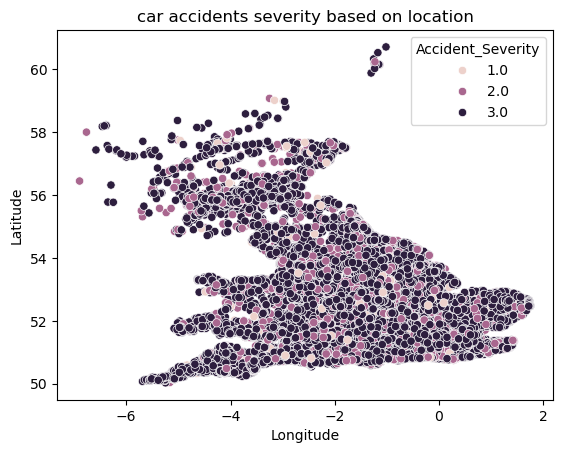

In [200]:
sb.scatterplot(x = df['Longitude'], y = df['Latitude'], hue = df['Accident_Severity']);
plt.title('car accidents severity based on location');

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [204]:
wcss = []
for k in range(1, 11):
    k_means = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    k_means.fit(x_pca)
    wcss.append(k_means.inertia_)



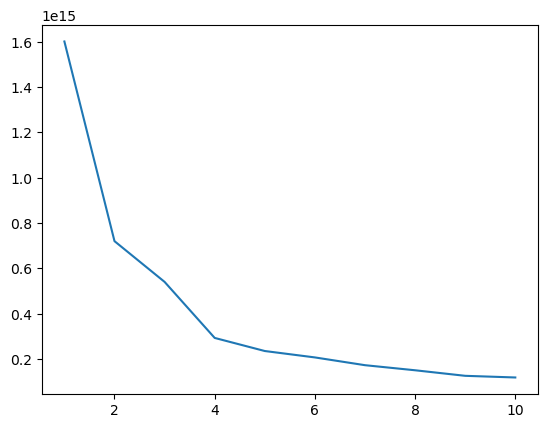

In [208]:
plt.plot(range(1,11), wcss);

The elbow method shows the best k value is 4

In [215]:
km = KMeans(n_clusters = 4, random_state = 42)
km.fit(x_pca)

km.predict(x_pca)

array([0, 0, 2, ..., 0, 1, 0])

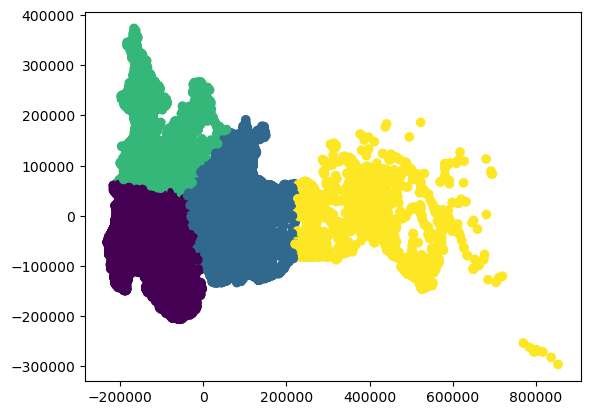

In [222]:
plt.scatter(x_pca.iloc[:,0], x_pca.iloc[:,1], c = km.labels_);

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [236]:
round(silhouette_score(x_pca, km.fit_predict(x_pca)),3)

0.532

## Plot the data points with their predicted cluster center

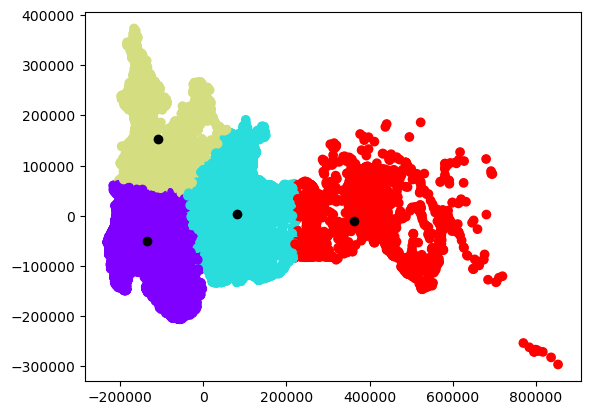

In [234]:
#Detecting center placement
plt.scatter(x_pca.iloc[:, 0], x_pca.iloc[:, 1], c = km.labels_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='black', marker = 'o')
plt.show()


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

I chose K-means for clustering because DBSCAN is better in dense, already seperated data. Using DBSCAN in such dataset may cause a very low silhouette score.

As the elbow method suggested, I used k value of 4. Meaning four clusters

I used silhouette_score to evalute the model, and it returned a score of **0.53**

The dataset could use some feature engenering and potintially better methods for a more accurate  result.